In [220]:

    
import pandas as pd
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi']= 120

In [234]:
your_palette = sns.color_palette("Set1", 10).append(sns.color_palette("husl", 10))

In [230]:
sns.color_palette("Set1", 25)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.494117

In [2]:
data_input =pd.read_csv("../data/data_input.csv")

C:\Users\weiluhan\AppData\Local\Continuum\anaconda3\envs\fda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [187]:
data_input.drugindication.value_counts().head(5).index

Index(['PRODUCT USED FOR UNKNOWN INDICATION', 'BREAST CANCER',
       'BREAST CANCER METASTATIC', 'BREAST CANCER FEMALE',
       'NON-SMALL CELL LUNG CANCER'],
      dtype='object')

In [204]:
data_input.primarysourcecountry.value_counts().head(20)

US    583354
JP    104363
DE     96942
CA     84958
GB     75926
FR     65178
CN     37539
BE     23649
ES     22781
IT     22010
NL     16938
PL     13812
AT     13375
KR     13313
CZ     10922
PT      9875
CO      9791
AU      8792
BR      8595
CL      7475
Name: primarysourcecountry, dtype: int64

In [236]:
clarity_color_table = pd.crosstab(index=data_input["primarysourcecountry"] , 
                          columns=data_input["drugindication"])

table=clarity_color_table.loc[['US','JP','DE','CA','GB','FR','CN'],data_input.drugindication.value_counts().head(10).index[1:]]

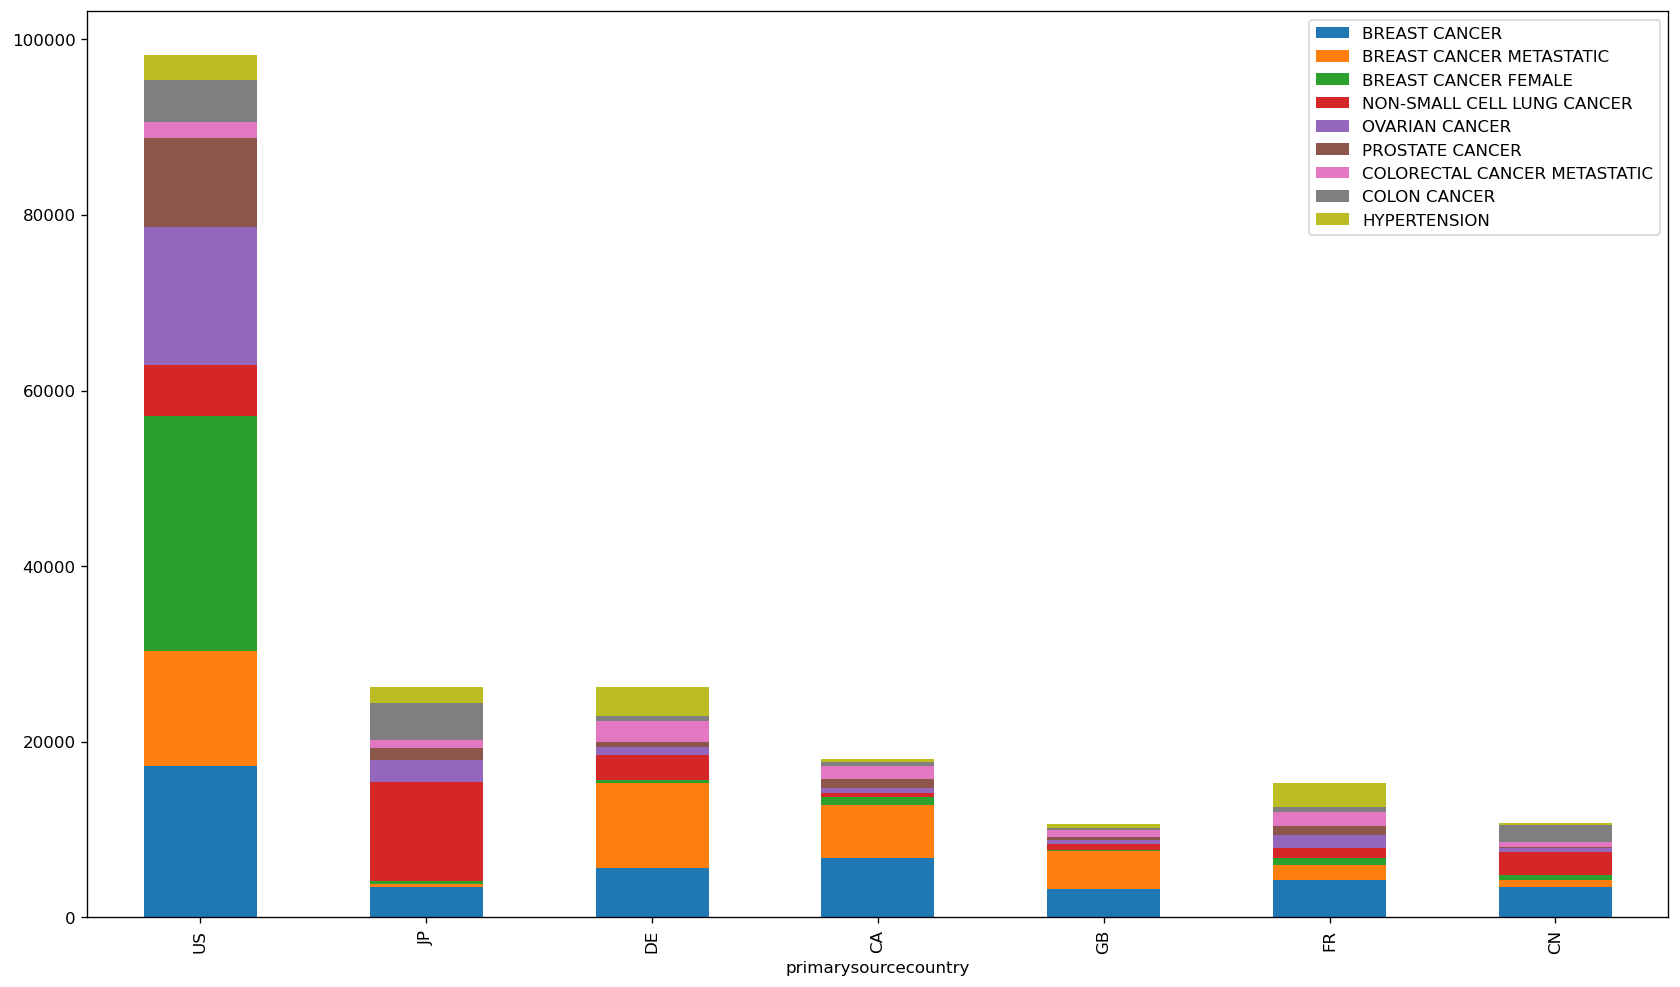

In [237]:
table.plot(kind="bar", 
                 figsize=(17,10),
                 stacked=True,color=your_palette)

In [3]:
## running explorotary analsysis to check the association between adverse events and disease area

In [4]:
data_input.drugindication.value_counts().nlargest(20)

PRODUCT USED FOR UNKNOWN INDICATION    196778
BREAST CANCER                           64772
BREAST CANCER METASTATIC                48293
BREAST CANCER FEMALE                    31719
NON-SMALL CELL LUNG CANCER              30466
OVARIAN CANCER                          27572
PROSTATE CANCER                         20820
COLORECTAL CANCER METASTATIC            20121
COLON CANCER                            16574
HYPERTENSION                            14914
HER-2 POSITIVE BREAST CANCER            14569
RENAL CANCER                            13375
CHEMOTHERAPY                            11858
PROPHYLAXIS                             11662
COLORECTAL CANCER                       10535
PAIN                                     9450
RECTAL CANCER                            6565
CANCER PAIN                              5891
HORMONE-REFRACTORY PROSTATE CANCER       5773
METASTASES TO BONE                       5643
Name: drugindication, dtype: int64

In [5]:
data_input.reactionmeddrapt.value_counts().nlargest(20) 

Diarrhoea                         31883
Alopecia                          31617
Fatigue                           30940
Nausea                            29671
Vomiting                          17922
Malignant neoplasm progression    16559
Decreased appetite                16363
Death                             15790
Dyspnoea                          14377
Asthenia                          14201
Neutropenia                       12334
Anaemia                           11799
Pain                              11793
Pyrexia                           11467
Constipation                      11171
Off label use                     11167
Pneumonia                         10824
Weight decreased                   9587
Psychological trauma               9580
Rash                               9379
Name: reactionmeddrapt, dtype: int64

In [6]:
# I am interested to see what type of adverse events are associated with Drug Lynparza

data_input[data_input.medicinalproduct=="LYNPARZA"]

,Unnamed: 0,Unnamed: 0_x,drugstartdateformat,drugindication,drugintervaldosageunitnumb,drugbatchnumb,drugadministrationroute,drugstartdate,drugenddateformat,openfda,...,drugcumulativedosageunit,drugcumulativedosagenumb,drugrecurreadministration,drugrecurrence,drugtreatmentduration,drugtreatmentdurationunit,Unnamed: 0_y,reactionmeddraversionpt,reactionmeddrapt,reactionoutcome
1976,1978,0,102.0,OVARIAN CANCER,1.0,NaN,48.0,20181119.0,610.0,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,3.0,18300.0,NaN,NaN,NaN,NaN,0,21.1,Malignant neoplasm progression,6.0
1977,1979,0,102.0,OVARIAN CANCER,1.0,NaN,48.0,20181119.0,610.0,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,3.0,18300.0,NaN,NaN,NaN,NaN,1,21.1,Metastases to central nervous system,6.0
1978,1980,0,102.0,OVARIAN CANCER,1.0,NaN,48.0,20181119.0,610.0,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,3.0,18300.0,NaN,NaN,NaN,NaN,2,21.1,Nausea,3.0
4675,4677,0,102.0,OVARIAN CANCER,NaN,NaN,48.0,20181012.0,102.0,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,NaN,NaN,NaN,NaN,NaN,NaN,2,21.1,Ascites,1.0
4676,4678,0,102.0,OVARIAN CANCER,NaN,NaN,48.0,20181012.0,102.0,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,NaN,NaN,NaN,NaN,NaN,NaN,3,21.1,Drug interaction,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315147,1359993,0,NaN,BREAST CANCER METASTATIC,NaN,NR,48.0,NaN,NaN,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,NaN,NaN,NaN,NaN,NaN,NaN,0,22.1,Malignant neoplasm progression,3.0
1323230,1368393,0,NaN,BREAST CANCER FEMALE,1.0,NaN,48.0,NaN,NaN,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,NaN,NaN,NaN,NaN,NaN,NaN,0,22.1,Hospice care,6.0
1323275,1368448,0,NaN,OVARIAN CANCER,NaN,NaN,48.0,NaN,NaN,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,NaN,NaN,NaN,NaN,NaN,NaN,0,22.1,Erythema nodosum,6.0
1324518,1369787,10,102.0,OVARIAN CANCER,1.0,NaN,48.0,20180615.0,102.0,"{'product_ndc': ['0310-0679', '0310-0668'], 'p...",...,3.0,268800.0,NaN,NaN,NaN,NaN,0,22.1,Acute myeloid leukaemia,3.0


In [7]:
data_input[data_input.medicinalproduct=="LYNPARZA"].drugindication.value_counts() # typically used to treat which disease

OVARIAN CANCER                          2776
BREAST CANCER FEMALE                     366
OVARIAN EPITHELIAL CANCER                328
BREAST CANCER METASTATIC                 215
BREAST CANCER                            215
OVARIAN CANCER RECURRENT                 180
PROSTATE CANCER                          158
PRODUCT USED FOR UNKNOWN INDICATION      153
OVARIAN CANCER STAGE III                 127
OVARIAN CANCER STAGE IV                  115
MALIGNANT PERITONEAL NEOPLASM            115
GALLBLADDER CANCER                       110
MALIGNANT NEOPLASM OF UTERINE ADNEXA      99
FALLOPIAN TUBE CANCER                     63
BRCA2 GENE MUTATION                       55
BRCA1 GENE MUTATION                       46
PULMONARY MASS                            44
OVARIAN CANCER METASTATIC                 17
PROSTATE CANCER METASTATIC                14
ABDOMINAL PAIN                            10
BREAST CANCER RECURRENT                   10
BONE CANCER                                8
PANCREATIC

## calculation proportional report rate

In [50]:
a =data_input[(data_input.medicinalproduct=="LYNPARZA")&(data_input.drugcharacterization==1|2)].shape[0]

In [51]:
c =data_input[(data_input.medicinalproduct=="LYNPARZA")&(data_input.reactionmeddrapt=="Vomiting")&(data_input.drugcharacterization==1|2)].shape[0]

In [52]:
a

55

In [74]:
b=data_input[(data_input.reactionmeddrapt=="Vomiting") ].shape[0]

In [75]:
d =data_input.shape[0]

In [76]:
b/(b+d)

0.013332559655058517

In [56]:
a/(a+c)/(b/(b+d))

45.56969026548672

In [7]:
data_input.groupby(['safetyreportid']).first().patientsex.value_counts()

2.0    34812
1.0    21317
0.0        7
Name: patientsex, dtype: int64

In [211]:
27925/60916

0.4584181495830324

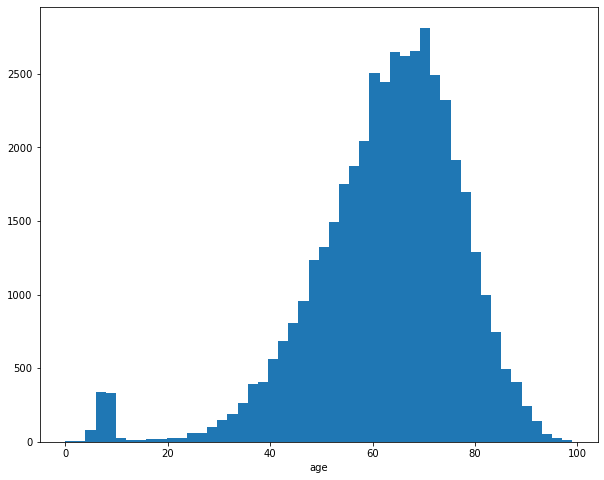

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
age = data_input.groupby(['safetyreportid']).first().patientonsetage
plt.hist(age[age<100],bins=50)
 
plt.xlabel("age")

plt.show()

In [14]:
data_input.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'drugstartdateformat', 'drugindication',
       'drugintervaldosageunitnumb', 'drugbatchnumb',
       'drugadministrationroute', 'drugstartdate', 'drugenddateformat',
       'openfda', 'drugenddate', 'drugstructuredosageunit', 'medicinalproduct',
       'activesubstance', 'drugadditional', 'drugcharacterization',
       'drugstructuredosagenumb', 'drugintervaldosagedefinition',
       'drugseparatedosagenumb', 'actiondrug', 'drugdosagetext',
       'drugdosageform', 'drugauthorizationnumb', 'safetyreportid',
       'primarysourcecountry', 'patientonsetage', 'patientsex', 'receivedate',
       'drugcumulativedosageunit', 'drugcumulativedosagenumb',
       'drugrecurreadministration', 'drugrecurrence', 'drugtreatmentduration',
       'drugtreatmentdurationunit', 'Unnamed: 0_y', 'reactionmeddraversionpt',
       'reactionmeddrapt', 'reactionoutcome'],
      dtype='object')

In [70]:
import numpy as np
L="COLON CANCER"
out = data_input.groupby('safetyreportid').filter(lambda x: any(x['medicinalproduct']=="TAGRISSO"))

In [71]:
out.shape

(12908, 39)

In [64]:
out[out.reactionmeddrapt=="Vomiting"].shape

(200, 38)

In [69]:
# write a function to calculate PPR
import numpy as np
def prr(s, t,data_input):
    out = data_input.groupby('safetyreportid').filter(lambda x: any(x['medicinalproduct']==s))
    a = out[out.reactionmeddrapt==t].shape[0]
    c= out.shape[0]
     
    d =data_input.groupby('safetyreportid').filter(lambda x: all(x['medicinalproduct']!=s))
    b=d[(d.reactionmeddrapt==t) ].shape[0]
    
    # x = a
    # n-x=c
    # E=b+a
    # N -E=  c+ d
    # calculate s for ln(prr)
    try:
        prr=a/(a+c)/(b/(b+d.shape[0]))
        s = np.sqrt(1/a+1/c - 1/(b+a) - 1/(c+d.shape[0]))
        return  prr,prr/np.exp(1.96*s),prr*np.exp(1.96*s)
    except:
        return 0,0,0
     

In [31]:
prr("LYNPARZA","Vomiting",data_input)

(1.1496667142743275, 1.0005862812638258, 1.3209591003395191)

 ##  generate PRR for each moth in 2019

In [11]:
 data_input.receivedate

0          20190101
1          20190101
2          20190101
3          20190101
4          20190101
             ...   
1326301    20191231
1326302    20191231
1326303    20191231
1326304    20191231
1326305    20191231
Name: receivedate, Length: 1326306, dtype: int64

In [16]:
data_input.index = pd.to_datetime(data_input.receivedate,format='%Y%m%d')

In [15]:
 data_input['time'] 

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
1326301   2019-12-31
1326302   2019-12-31
1326303   2019-12-31
1326304   2019-12-31
1326305   2019-12-31
Name: time, Length: 1326306, dtype: datetime64[ns]

In [32]:
m =data_input.groupby(pd.Grouper(freq='M'))

In [33]:
output =m.apply(lambda x:prr("LYNPARZA","Vomiting",x)) 
 

In [38]:
result =pd.DataFrame(output.tolist(), index=output.index,columns=["prr","l","u"])

Text(0.5, 1.0, 'association of Vomiting and LYNPARZA')

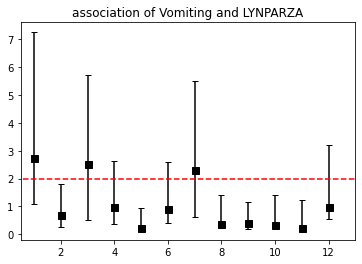

In [62]:
import matplotlib.pyplot as plt
plt.errorbar(x=result.index.month, y=result.prr, yerr=[result.l,result.u], color="black", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="black", mec="black" )
plt.hlines(2, xmin=0,xmax=13,  color='r',linestyle="--")
plt.xlim(0.5, 13)
plt.title("association of Vomiting and LYNPARZA" )

In [41]:
result.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='receivedate', freq=None)

In [73]:
events=['Fatigue',  'Nausea',   'Vomiting' ,'Death']       
drug = ["LYNPARZA","TAGRISSO","IRESSA"]

In [74]:
for d in drug:
    for e in events:
        try:
            output =m.apply(lambda x:prr(d,e,x)) 
        except:
            continue
        result =pd.DataFrame(output.tolist(), index=output.index,columns=["prr","l","u"])
        plt.errorbar(x=result.index.month, y=result.prr, yerr=[result.l,result.u], color="black", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="black", mec="black" )
        plt.hlines(2, xmin=0,xmax=13,  color='r',linestyle="--")
        plt.xlim(0.5, 13)
        plt.title("association of " +e+" "+"and"+" "+d)
        result.to_csv('../output/'+d+'_'+e+'_2019.csv')
        plt.savefig('../output/'+d+'_'+e+'_2019.png')
        plt.close()

## check drug drug Interaction
 1. check what other drugy tend to use with TAGRISSO
 2. Get all the safetyreportid contains TAGRISSO 
 

In [118]:
 
out = data_input.groupby('safetyreportid').filter(lambda x: any(x['medicinalproduct']=="LYNPARZA"))

In [119]:
out2 = out[out.medicinalproduct!="TAGRISSO"][["safetyreportid","medicinalproduct" ]]

In [120]:
out3 =out[out.medicinalproduct=="LYNPARZA"] 

In [121]:
diifinal = out3.merge(out2,on="safetyreportid")

In [122]:
out3.shape

(5343, 39)

In [238]:
diifinal.groupby(['medicinalproduct_x','medicinalproduct_y']).size().sort_values(ascending=False)

medicinalproduct_x  medicinalproduct_y    
TAGRISSO            IRESSA                    8588
                    ERLOTINIB                 2339
                    TARCEVA                   2085
                    AVASTIN                   1606
                    MIYA-BM                   1547
                                              ... 
                    TAPAZOLE                     1
                    IRCODONE                     1
                    PREGABALIN.                  1
                    FERROBA-U                    1
                    SULFAMETHOXAZOLE-TRIME       1
Length: 836, dtype: int64

In [240]:
 
out = data_input.groupby('safetyreportid').filter(lambda x: any(x['medicinalproduct']=="LYNPARZA"))
out2 = out[out.medicinalproduct!="LYNPARZA"][["safetyreportid","medicinalproduct" ]]
out3 =out[out.medicinalproduct=="LYNPARZA"] 
diifinal = out3.merge(out2,on="safetyreportid")
diifinal.groupby(['medicinalproduct_x','medicinalproduct_y']).size().sort_values(ascending=False).head(5)

medicinalproduct_x  medicinalproduct_y
LYNPARZA            CYMBALTA              14184
                    LORAZEPAM.             7609
                    NATURALAG              6776
                    VANCOMYCIN             6534
                    VITAMIN D3             6324
dtype: int64

In [134]:
out = data_input.groupby('safetyreportid').filter(lambda x: any(x['medicinalproduct']=="IRESSA"))
out2 = out[out.medicinalproduct!="IRESSA"][["safetyreportid","medicinalproduct" ]]
out3 =out[out.medicinalproduct=="IRESSA"] 
diifinal = out3.merge(out2,on="safetyreportid")
diifinal.groupby(['medicinalproduct_x','medicinalproduct_y']).size().sort_values(ascending=False).head(5)

medicinalproduct_x  medicinalproduct_y          
IRESSA              TAGRISSO                        8588
                    AMITRIPTYLINE HYDROCHLORIDE.     882
                    PEMBROLIZUMAB.                   882
                    HYDROCODONE-ACETAMINOPHEN        882
                    ERLOTINIB                        450
dtype: int64

## check drug drug interaction associated with adverse events

In [152]:
# write a function to calculate PPR
import numpy as np
def prri(s,s1, t,data_input):
    out = data_input.groupby('safetyreportid').filter(lambda x: any(x['medicinalproduct_x']==s))
    out = out.groupby('safetyreportid').filter(lambda x: any(x['medicinalproduct_y']==s1))
    a = out[out.reactionmeddrapt==t].shape[0]
    c= out.shape[0]
     
    d =data_input.groupby('safetyreportid').filter(lambda x: all(x['medicinalproduct_y']!=s1))
    #d =d.groupby('safetyreportid').filter(lambda x: all(x['medicinalproduct']!=s1))
    b=d[(d.reactionmeddrapt==t) ].shape[0]
    
    # x = a
    # n-x=c
    # E=b+a
    # N -E=  c+ d
    # calculate s for ln(prr)
    try:
        prr=a/(a+c)/(b/(b+d.shape[0]))
        s = np.sqrt(1/a+1/c - 1/(b+a) - 1/(c+d.shape[0]))
        return  [prr,prr/np.exp(1.96*s),prr*np.exp(1.96*s)]
    except:
        return [0,0,0]
     

In [126]:
prri("LYNPARZA","CYMBALTA","Fatigue",diifinal)

(0.7351790368277152, 0.6889786876106713, 0.7844774096936169)

In [127]:
prri("LYNPARZA","CYMBALTA","Nausea",diifinal)

(0.7092921434229275, 0.6635331100649239, 0.7582068431705917)

In [135]:
prri("IRESSA","HYDROCODONE-ACETAMINOPHEN","Pain",diifinal) 

(0, 0, 0)

In [136]:
prri("IRESSA","HYDROCODONE-ACETAMINOPHEN","Vomiting",diifinal) 

(7.694055944055945, 7.0147836502924354, 8.439105155836806)

In [137]:
prri("IRESSA","HYDROCODONE-ACETAMINOPHEN","Nausea",diifinal) 

(3.944741532976827, 3.5420552250475237, 4.3932081159981315)

In [138]:
prri("IRESSA","TAGRISSO","Nausea",diifinal) 

(0.2537367487251999, 0.23363664275022775, 0.27556609654960673)

In [141]:
prri("IRESSA","TAGRISSO","Death",diifinal) 

(0, 0, 0)

In [171]:
interaction = [ 'ERLOTINIB' ,'TARCEVA'  , 'AVASTIN','MIYA-BM' ] 

In [173]:
output=[]
for d in interaction:
    for e in events:
            out = data_input.groupby('safetyreportid').filter(lambda x: any(x['medicinalproduct']=="TAGRISSO"))
            out2 = out[out.medicinalproduct!="TAGRISSO"][["safetyreportid","medicinalproduct" ]]
            out3 =out[out.medicinalproduct=="TAGRISSO"] 
            diifinal = out3.merge(out2,on="safetyreportid")
            try:
                t = prri("TAGRISSO",d,e,diifinal)
                t.append(d)
                t.append(e)
                output.append(t)
            except:
                continue
    result =pd.DataFrame(output ,columns=['prr','l','u','drug_interaction','event'])
    result.to_csv('../output_interaction/TAGRISSO_'+d+'_2019.csv')
    output=[]

'Fatigue'

In [151]:
pd.DataFrame(output)

,0,1,2
0,Fatigue,"(0.5910458396009818, 0.5504070841629194, 0.634...",NaN
1,Nausea,"(0.2537367487251999, 0.23363664275022775, 0.27...",NaN
2,Vomiting,"(0.6335400047389622, 0.5958590418652684, 0.673...",NaN
3,Death,"(0, 0, 0)",NaN
4,Fatigue,"(14.960227272727273, 13.863899792512816, 16.14...",NaN
5,Nausea,"(3.944741532976827, 3.5420552250475237, 4.3932...",NaN
6,Vomiting,"(7.694055944055945, 7.0147836502924354, 8.4391...",NaN
7,Death,"(0, 0, 0)",NaN
8,Fatigue,"(14.960227272727273, 13.863899792512816, 16.14...",NaN
9,Nausea,"(3.944741532976827, 3.5420552250475237, 4.3932...",NaN
